# Assessing Data For Case Study 1: Wine Quality

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the 2 files and inspect them
df_red = pd.read_csv('winequality-red.csv' , sep = ';')
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_white = pd.read_csv('winequality-white.csv' , sep = ';')
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#use shape to get number of rows and columns
df_red.shape

(1599, 12)

In [5]:
df_white.shape

(4898, 12)

In [6]:
#use info() to get number of non null entries for each column
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
#count how many duplicate rows in white wine dataset
df_white.duplicated().sum()

937

In [9]:
#how many unique value for quality column for each dataset
df_red.quality.nunique()

6

In [10]:
df_white.quality.nunique()

7

In [11]:
#mean density for the red wine dataset
df_red.density.mean()

0.9967466791744833

# Merge the two datasets to analyze the data

In [12]:
#add extra column to identify the color of the wine in each dataset
#use repeat function in numpy to get repeated value array
#np.repeat(value, Number of repetition)
#df.shape[0] to get the number of the rows in the dataframe
color_red = np.repeat('red', df_red.shape[0])
color_white = np.repeat('white', df_white.shape[0])

In [13]:
#add the new columns to datasets
df_red['color'] = color_red
df_white['color'] = color_white

In [14]:
#check that new columns added
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  color                 1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [15]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [16]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [17]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [18]:
#append the white wine dataset to the red wine dataset
wine_df = df_red.append(df_white)

In [19]:
#check the new dataset of the combined wine types
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [20]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [21]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


# Save the new dataset in CSV file to deal with it easily

In [22]:
#use to_csv() to save the new dataset
#set the index argument to false to avoid storing extra unnamed column for indexing
wine_df.to_csv('colored_wine.csv' , index = False)

In [23]:
#load the new dataset
df_wine = pd.read_csv('colored_wine.csv')

In [24]:
df_wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
3652,8.6,0.485,0.29,4.1,0.026,19.0,101.0,0.99180,3.01,0.38,12.4,5,white
1815,7.5,0.270,0.36,7.0,0.036,45.0,164.0,0.99390,3.03,0.33,11.0,5,white
2750,6.8,0.320,0.18,7.5,0.041,71.0,223.0,0.99590,3.14,0.41,8.9,5,white
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,red
1376,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5,red
1336,6.0,0.500,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5,red
3890,8.6,0.170,0.28,2.7,0.047,38.0,150.0,0.99365,3.10,0.56,10.8,6,white
5245,7.2,0.330,0.22,4.5,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,7,white
5615,7.2,0.400,0.24,8.5,0.055,45.0,151.0,0.99626,3.20,0.52,9.2,5,white
4973,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,white


In [25]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Exploring Data with Visuals

### Display Histogram for *Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol*

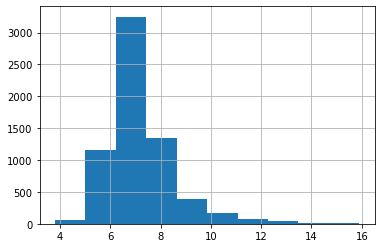

In [26]:
#put ; to show just the figure
df_wine['fixed acidity'].hist();

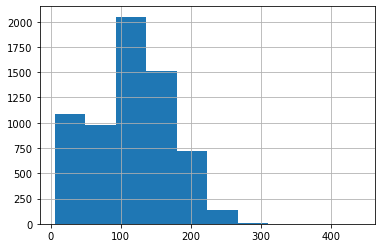

In [27]:
df_wine['total sulfur dioxide'].hist();

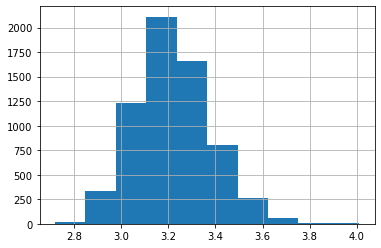

In [28]:
df_wine['pH'].hist();

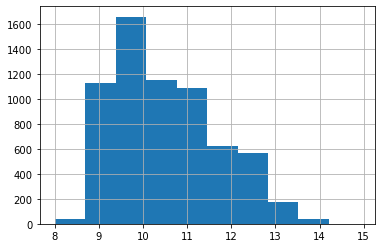

In [29]:
df_wine.alcohol.hist();

#### The Fixed Acidity and Alcohol are Right Skewed

### Display Scatter plot for quality against *Volatile Acidity, Residual Sugar, pH, Alcohol*
[click here for plot documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

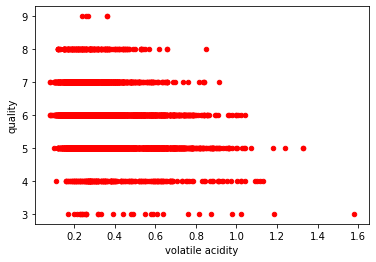

In [30]:
#use plot(x='columnname' , y='columnname' , kind = 'scatter' , c='color') from pandas
df_wine.plot(y = 'quality' , x = 'volatile acidity' , kind = 'scatter' , c = 'red');

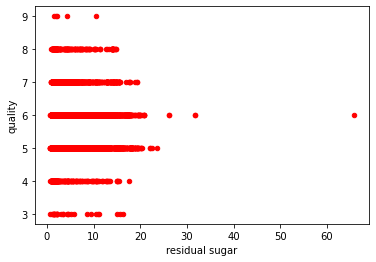

In [31]:
df_wine.plot(y = 'quality' , x = 'residual sugar' , kind = 'scatter' , c = 'red');

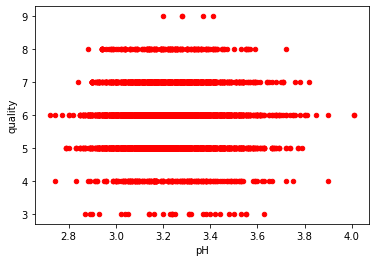

In [32]:
df_wine.plot(y = 'quality' , x = 'pH' , kind = 'scatter' , c = 'red');

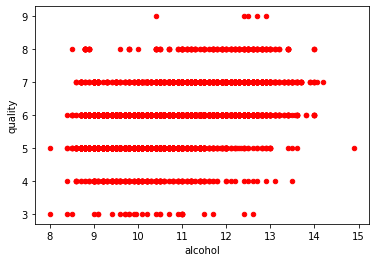

In [33]:
df_wine.plot(y = 'quality' , x = 'alcohol' , kind = 'scatter' , c = 'red');

#### from the above scatter plots we find alcohol has a positive impact on quality

### Is a certain type of wine (red or white) associated with higher quality?

In [34]:
#use groupby to answer the question
df_wine.groupby('color').quality.mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### What level of acidity (pH value) receives the highest average rating?

In [35]:
#groupby pH
df_wine.groupby('pH').quality.mean()

pH
2.72    6.000000
2.74    5.000000
2.77    6.000000
2.79    5.000000
2.80    5.666667
          ...   
3.81    6.000000
3.82    7.000000
3.85    6.000000
3.90    5.000000
4.01    6.000000
Name: quality, Length: 108, dtype: float64

#### pH is a quantitative variable without clear categories. However, there is a simple fix to this. You can create a categorical variable from a quantitative variable by creating your own categories. [pandas' cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) function let's you "cut" data in groups. Using this, create a new column called `acidity_levels` with these categories:

**Acidity Levels:**
- High: Lowest 25% of pH values
- Moderately High: 25% - 50% of pH values
- Medium: 50% - 75% of pH values
- Low: 75% - max pH value

In [36]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df_wine.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [37]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with the values we just found after using describe()

In [38]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [39]:
# Creates acidity_levels column
df_wine['acidity levels'] = pd.cut(df_wine['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [40]:
# Find the mean quality of each acidity level with groupby
df_wine.groupby('acidity levels').mean().quality

acidity levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

#### Low level of Acidity receives highest average rating

In [41]:
# Save changes for the next section
df_wine.to_csv('all_wine.csv', index=False)

###  Do wines with higher alcoholic content receive better ratings?

To answer this question, use query to create two groups of wine samples:

Low alcohol (samples with an alcohol content less than the median)
High alcohol (samples with an alcohol content greater than or equal to the median)
Then, find the mean quality rating of each group.

In [48]:
#find the median for the alcohol
alcohol_median = df_wine.alcohol.median()

In [49]:
#divide the dataset to two groups one for low alcohol level and the other for high alcohol level
df_low = df_wine.query('alcohol < {}'.format(alcohol_median))
df_high = df_wine.query('alcohol >= {}'.format(alcohol_median))

In [50]:
#display the average quality for each group
df_low.quality.mean() , df_high.quality.mean()

(5.475920679886686, 6.146084337349397)

##### Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. 

In [54]:
mean_quality_low = df_low.quality.mean()
mean_quality_high = df_high.quality.mean()

Text(0, 0.5, 'Average Quality Rating')

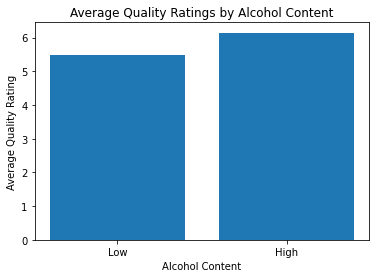

In [57]:
# Create a bar chart with proper labels - you need to import matplotlib "matplotlib.pyplot as plt"
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating')

### Do sweeter wines (more residual sugar) receive better ratings?
same strategy as before

In [51]:
#find the median for the residual sugar
sugar_median = df_wine['residual sugar'].median()

In [52]:
# use `` if the column name contains spaces
#divide the dataset to two groups one for low sugar level and the other for high sugar level
df_low_sugar = df_wine.query('`residual sugar` < {}'.format(sugar_median))
df_high_sugar = df_wine.query('`residual sugar` >= {}'.format(sugar_median))

In [53]:
#display the average quality for each group
df_low_sugar.quality.mean() , df_high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

##### Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [59]:
low_sugar_mean = df_low_sugar.quality.mean()
high_sugar_mean = df_high_sugar.quality.mean()

Text(0, 0.5, 'Average Quality Rating')

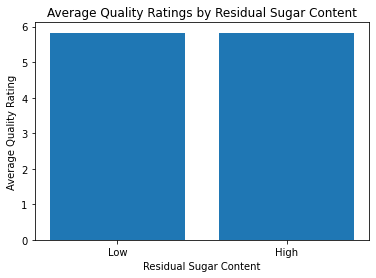

In [60]:
# we need to define locations for the x axis, the height of each location (which is the y axis), labels for the locations
# and labels for each axis
locations = [1, 2]
heights = [low_sugar_mean, high_sugar_mean]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar Content')
plt.xlabel('Residual Sugar Content')
plt.ylabel('Average Quality Rating')

### What level of acidity receives the highest average rating?

##### Create a bar chart with a bar for each of the four acidity levels.

Text(0, 0.5, 'Average Quality Rating')

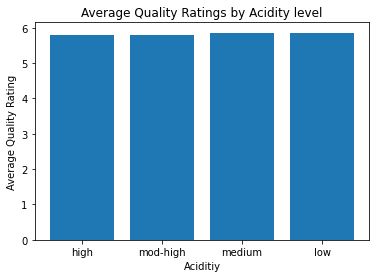

In [62]:
# we need to define locations for the x axis, the height of each location (which is the y axis), labels for the locations
# and labels for each axis
locations = [1, 2, 3, 4]
heights = df_wine.groupby('acidity levels').quality.mean()
labels = ['high', 'mod-high', 'medium', 'low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity level')
plt.xlabel('Aciditiy')
plt.ylabel('Average Quality Rating')

#####  Create a line plot for the data

Text(0, 0.5, 'Average Quality Rating')

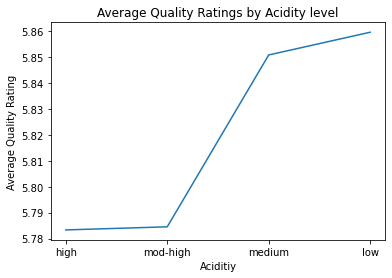

In [64]:
plt.plot(labels, heights)
plt.title('Average Quality Ratings by Acidity level')
plt.xlabel('Aciditiy')
plt.ylabel('Average Quality Rating')